In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# log --> line

In [2]:
# log: key, value
def plot_log_line(log_name, legend=[], legend_loc="upper left", fontsize=12, xlabel="xlabel", ylabel="ylabel", baseline=0.0, baseline_label="baseline", xbegin=0, xend=0, ybegin=0, yend=0):
    data = pd.read_csv(log_name, sep="\s+", header=None)
    ncols = data.shape[1]
    if baseline > 0.0:
        plt.axhline(y=baseline, xmin=0, xmax=1, linestyle='-', linewidth=1, color='red', label=baseline_label)
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    if xbegin > 0 or xend > 0:
        plt.xlim((xbegin, xend))
    if ybegin > 0 or yend > 0:
        plt.ylim((ybegin, yend))
    linepoints = ["o-", "^-", "s-", "x-", "d-", "p-"]
    if ncols == 2:
        plt.plot(data[0], data[1], linepoints[0], color="black", markeredgecolor="black", markerfacecolor="white", linewidth=1, markersize=8)
    elif ncols > 2:
        for i in range(1, ncols):
            plt.plot(data[0], data[i], linepoints[i-1], label=legend[i-1], color="black", markeredgecolor="black", markerfacecolor="white", linewidth=1, markersize=8)
        plt.legend(frameon=True, fontsize=fontsize-2, loc=legend_loc, ncol=1)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in', which='major', length=4, labelsize=12)
    plt.grid(False)
    # plt.savefig(log_name+'.eps', bbox_inches='tight', transparent=True)
    plt.show()

# plot_log_line("test.txt")

# dict --> bar

In [3]:
def plot_dict_bar(wb=False, xlabel="xlabel", ylabel="ylabel", legend=[], legend_loc="upper left", baseline=0.0, baseline_label="baseline", baseline2=0.0, baseline_label2="baseline2", baseline3=0.0, baseline_label3="baseline3", baseline4=0.0, baseline_label4="baseline4", avg=False, percent=False, text=False, xlog=False, ylog=False, xrotation=0, fontsize=12, xbegin=0, xend=0, ybegin=0, yend=0, **dict): #dict={A:[], B:[]}
    firstkey, firstvalue = list(dict.items())[0]
    ncol = len(firstvalue)
    items =[[] for i in range(ncol)]
    for key, value in dict.items():
        for i in range(ncol):
            items[i].append(value[i])
    x = np.arange(len(dict))
    keys = list(dict.keys())
    if avg == True:
        for i in range(ncol):
            items[i].append(np.mean(items[i]))
        x = np.arange(len(dict)+1)
        keys.append("Avg")
    width = 0.8/ncol
    if width > 0.4:
        width = 0.4
    idx = -(ncol-1)/2
    textlist = []
    hatch_par = ['//', '', '--', 'xx', 'oo', 'OO', '..', '**', '||', '++']
    for i in range(ncol):
        if not wb:
          if len(legend) > 0:
              plt.bar(x+width*idx, items[i], width, edgecolor="k", label=legend[i])
          else:
              plt.bar(x+width*idx, items[i], width, edgecolor="k")
        else:
          if len(legend) > 0:
              plt.bar(x+width*idx, items[i], width, color='white', edgecolor="k", hatch=hatch_par[i], label=legend[i])
          else:
              plt.bar(x+width*idx, items[i], width, color='white', edgecolor="k", hatch=hatch_par[i])
        textlist += list(zip(x+width*idx, items[i]))
        idx += 1
    if text == True:
        for a, b in textlist:
            if percent == True:
                plt.text(a, b, '%.1f%%'%(b*100), ha="center", va="bottom", fontsize=fontsize)
            else:
                plt.text(a, b, '%.4f'%(b), ha="center", va="bottom", fontsize=fontsize)
    plt.xticks(x, keys, rotation=xrotation)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in', which='major', length=4, labelsize=fontsize)
    if xlog == True:
        plt.xscale('log')
    if ylog == True:
        plt.yscale('log')
    if len(legend) == ncol:
        if legend_loc == "upper right":
            ncol = 1
        plt.legend(loc=legend_loc, ncol=ncol//2+1)
    if baseline > 0.0:
        plt.axhline(y=baseline, linestyle='-', linewidth=1, color='blue', label=baseline_label)
        if baseline2 > 0.0:
            plt.axhline(y=baseline2, linestyle='--', linewidth=1, color='blue', label=baseline_label2)
            if baseline3 > 0.0:
                plt.axhline(y=baseline3, linestyle='-', linewidth=1, color='red', label=baseline_label3)
                if baseline4 > 0.0:
                    plt.axhline(y=baseline4, linestyle='--', linewidth=1, color='red', label=baseline_label4)
        plt.legend()
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    if xbegin > 0 or xend > 0:
        plt.xlim((xbegin, xend))
    if ybegin > 0 or yend > 0:
        plt.ylim((ybegin, yend))
    if percent == True:
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=1))
    # plt.savefig('abc.eps', bbox_inches='tight', transparent=True)
    plt.show()

# plot_dict_bar(legend=["aaa", "bbb", "ccc"], avg=True, percent=True, A=[0.1,0.2,0.3], B=[0.3,0.4,0.5])

# dict --> ratio bar

In [4]:
def get_dict(lower, upper, total, out):
    out_ratio = [(i/total)*100 for i in out]
    in_ratio = [(1-i/total)*100 for i in out]
    dict = {
        lower: np.array(in_ratio),
        upper: np.array(out_ratio),
    }
    return dict

def plot_dict_ratio_bar(dataset, species, dict):
    width = 0.6  # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    bottom = np.zeros(len(species))

    for in_out, ratio in dict.items():
        p = ax.bar(species, ratio, width, label=in_out, bottom=bottom)
        bottom += ratio
        ax.bar_label(p, label_type='center', fmt="%.1f%%")

    ax.set_title(dataset)
    ax.legend()
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0*100, decimals=0))

    xlabel = "Number of Servers"
    ylabel = "Ratio"
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


# metis time & memory

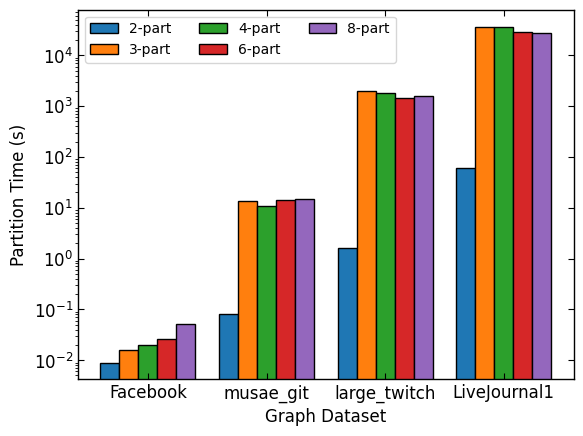

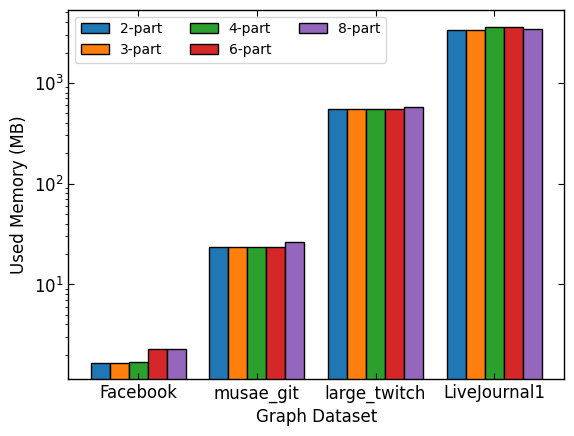

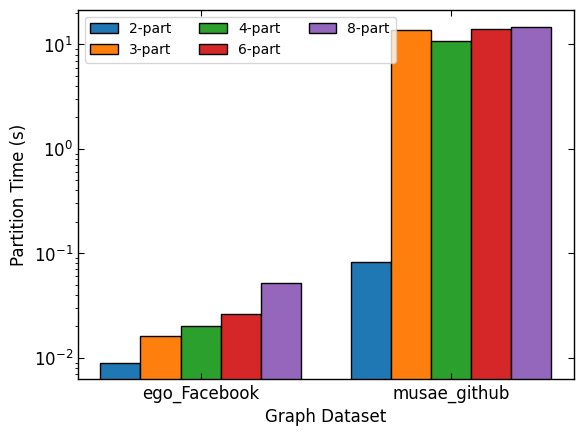

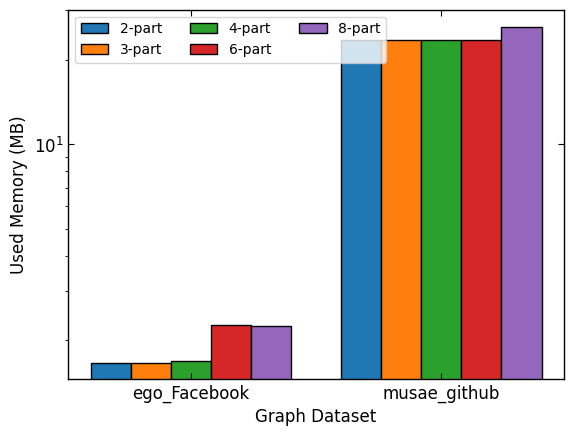

In [5]:
legend = ["2-part", "3-part", "4-part", "6-part", "8-part"]
xlabel = "Graph Dataset"

facebook_time = [0.009, 0.016, 0.020, 0.026, 0.052]
facebook_memory = [1.668, 1.668, 1.689, 2.276, 2.253]

git_time = [0.082, 13.613, 10.816, 14.138, 14.829]
git_memory = [23.429, 23.429, 23.601, 23.601, 26.261]

twitch_time = [1.589, 2009.741, 1787.444, 1427.884, 1562.253]
twitch_memory = [551.711, 551.711, 547.095, 547.095, 577.566]

livejournal_time = [60.315, 36909.922, 36648.551, 28842.840, 27370.709]
livejournal_memory = [3366.603, 3367.601, 3623.502, 3623.797, 3428.536]

plot_dict_bar(xlabel=xlabel, ylabel="Partition Time (s)", ylog=True, legend=legend, Facebook=facebook_time, musae_git=git_time, large_twitch=twitch_time, LiveJournal1=livejournal_time)
plot_dict_bar(xlabel=xlabel, ylabel="Used Memory (MB)", ylog=True, legend=legend, Facebook=facebook_memory, musae_git=git_memory, large_twitch=twitch_memory, LiveJournal1=livejournal_memory)

plot_dict_bar(xlabel=xlabel, ylabel="Partition Time (s)", ylog=True, legend=legend, ego_Facebook=facebook_time, musae_github=git_time)
plot_dict_bar(xlabel=xlabel, ylabel="Used Memory (MB)", ylog=True, legend=legend, ego_Facebook=facebook_memory, musae_github=git_memory)

# edgecut

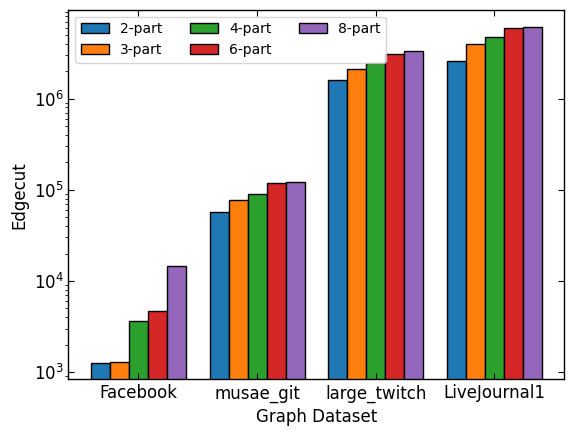

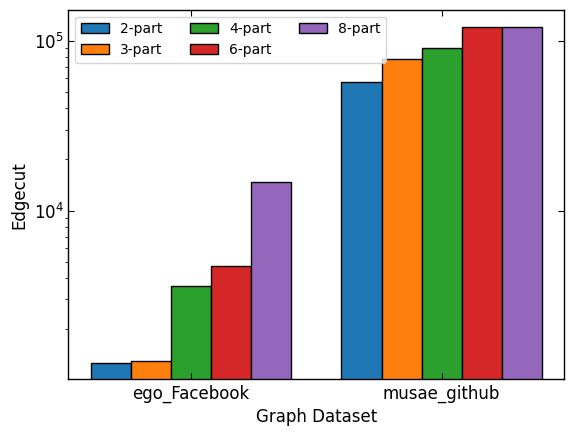

In [6]:
legend = ["2-part", "3-part", "4-part", "6-part", "8-part"]
xlabel = "Graph Dataset"

facebook = [1274, 1306, 3606, 4690, 14637]
git = [57029, 77688, 90105, 119915, 121228]
twitch = [1608352, 2114622, 2453728, 3082558, 3295897]
livejournal = [2593938, 3999558, 4749647, 5903960, 6185361]

plot_dict_bar(xlabel=xlabel, ylabel="Edgecut", ylog=True, legend=legend, Facebook=facebook, musae_git=git, large_twitch=twitch, LiveJournal1=livejournal)

plot_dict_bar(xlabel=xlabel, ylabel="Edgecut", ylog=True, legend=legend, ego_Facebook=facebook, musae_github=git)

# rw time (pyro)

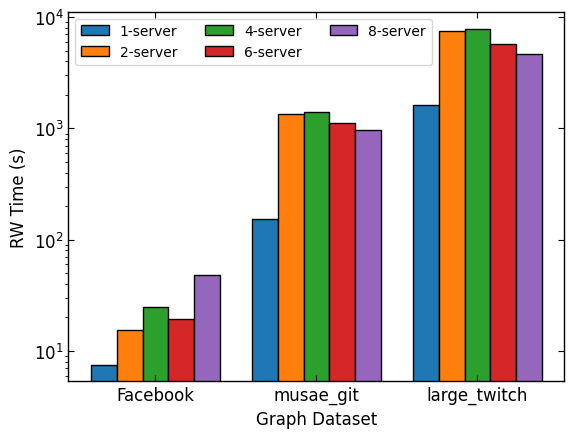

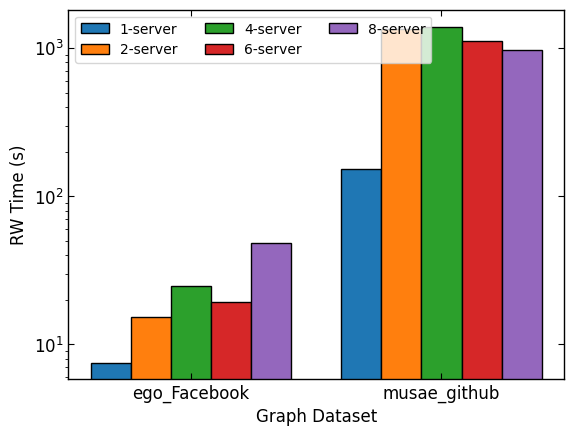

In [7]:
legend = ["1-server", "2-server", "4-server", "6-server", "8-server"]
xlabel = "Graph Dataset"

facebook_time = [7.550012588500977, 15.370547771453857, 24.850865840911865, 19.197396278381348, 48.13422727584839]
git_time = [152.96236538887024, 1353.7469317913055, 1397.0958833694458, 1115.3453476428986, 963.3960359096527]
twitch_time = [1607.8484554290771, 7483.882915496826, 7903.919793367386, 5706.983768701553, 4632.747408628464]

plot_dict_bar(xlabel=xlabel, ylabel="RW Time (s)", ylog=True, legend=legend, Facebook=facebook_time, musae_git=git_time, large_twitch=twitch_time)

plot_dict_bar(xlabel=xlabel, ylabel="RW Time (s)", ylog=True, legend=legend, ego_Facebook=facebook_time, musae_github=git_time)

# rw time (m1, mpi, partition)

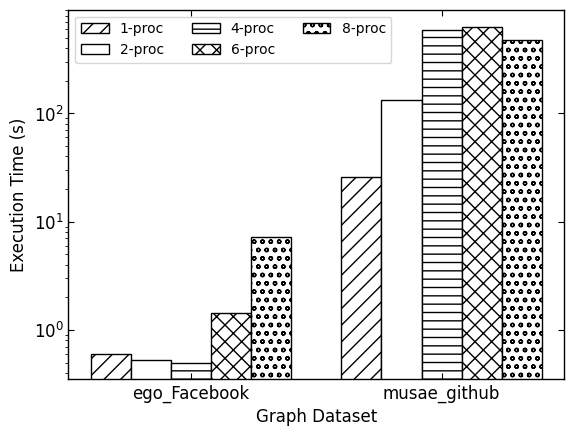

In [8]:
legend = ["1-proc", "2-proc", "4-proc", "6-proc", "8-proc"]
xlabel = "Graph Dataset"

facebook_time = [0.594404, 0.529954, 0.500131, 1.437399, 7.206064]
git_time = [25.765252, 133.875998, 594.210766, 633.718176, 477.205093]
twitch_time = []


plot_dict_bar(wb=True, xlabel=xlabel, ylabel="Execution Time (s)", ylog=True, legend=legend, ego_Facebook=facebook_time, musae_github=git_time)

# rw time (m1, mpi, entire)

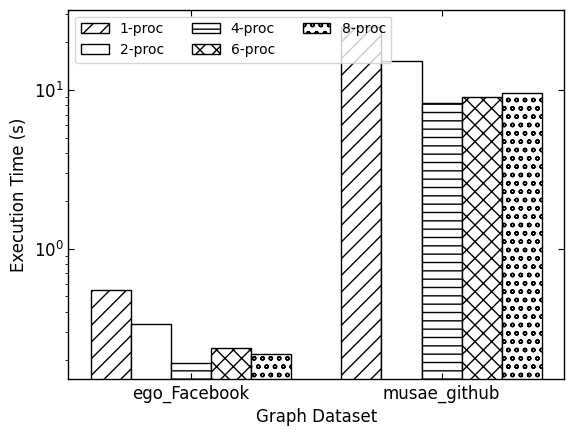

In [9]:
legend = ["1-proc", "2-proc", "4-proc", "6-proc", "8-proc"]
xlabel = "Graph Dataset"

facebook_time = [0.552270, 0.335679, 0.191955, 0.237407, 0.216007]
git_time = [25.075518, 15.172024, 8.278884, 9.004750, 9.569996]
twitch_time = []


plot_dict_bar(wb=True, xlabel=xlabel, ylabel="Execution Time (s)", ylog=True, legend=legend, ego_Facebook=facebook_time, musae_github=git_time)

# result ratio

In [10]:
species = ("1-server", "2-server", "4-server", "6-server", "8-server")

# plot_dict_ratio_bar("facebook (4,200 Walkers)", species, get_dict('Alive', 'Dead', 4200, [(4200-i) for i in [4200, 4200, 4200, 4200, 4200]]))
# plot_dict_ratio_bar("musae_git (18,000 Walkers)", species, get_dict('Alive', 'Dead', 36000, [(36000-i) for i in [36000, 36000, 14477, 17323, 22121]]))
# plot_dict_ratio_bar("large_twitch (150,000 Walkers)", species, get_dict('Alive', 'Dead', 150000, [(150000-i) for i in [150000, 59412, 10996, 45403, 16287]]))

# goout ratio

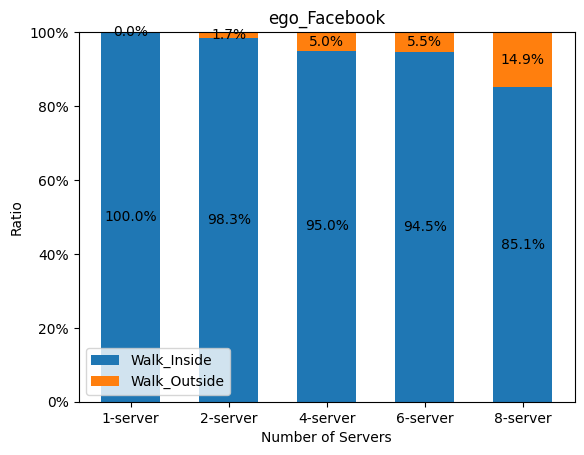

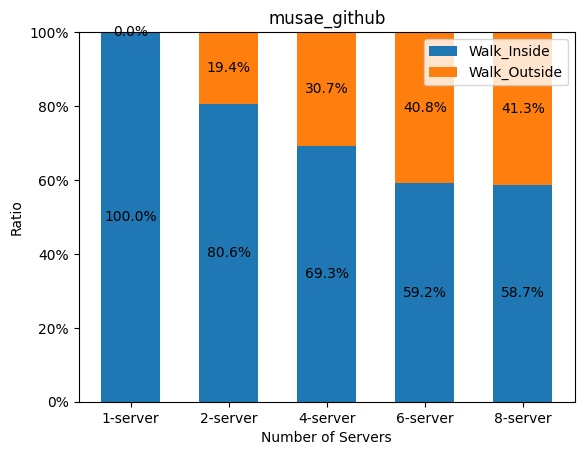

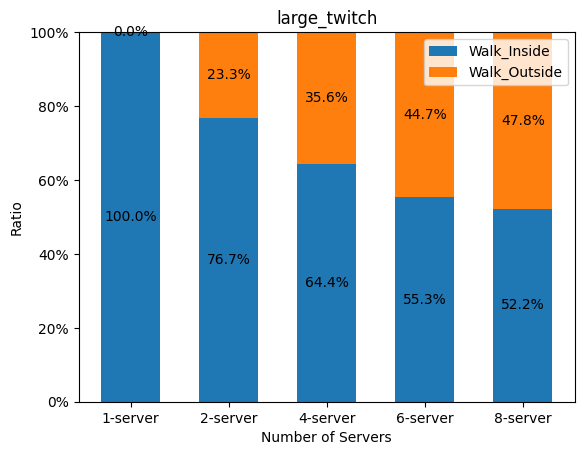

In [11]:
species = ("1-server", "2-server", "4-server", "6-server", "8-server")

plot_dict_ratio_bar("ego_Facebook", species, get_dict('Walk_Inside', 'Walk_Outside', 4200 * 79, [0, 5617, 16514, 18179, 49401]))
plot_dict_ratio_bar("musae_github", species, get_dict('Walk_Inside', 'Walk_Outside', 36000 * 79, [0, 551602, 873531, 1161339, 1174322]))
plot_dict_ratio_bar("large_twitch", species, get_dict('Walk_Inside', 'Walk_Outside', 150000 * 79, [0, 2762035, 4221867, 5297916, 5658896]))

# icicn

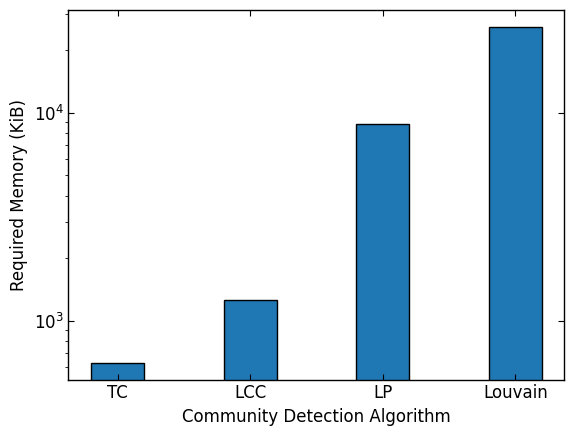

In [12]:
legend = ["TC = Triangle Count", "LCC = Local Clustering Coefficient", "LP = Label Propagation", "Louvain = Louvain"]
xlabel = "Community Detection Algorithm"

TC = [627]
LCC = [1254]
LP = [8820]
Louvain = [26000]

plot_dict_bar(xlabel=xlabel, ylabel="Required Memory (KiB)", ylog=True, legend=legend, TC=TC, LCC=LCC, LP=LP, Louvain=Louvain)

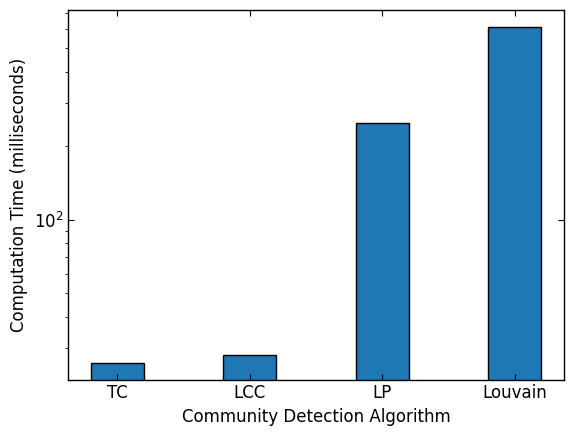

In [13]:
legend = ["TC = Triangle Count", "LCC = Local Clustering Coefficient", "LP = Label Propagation", "Louvain = Louvain"]
xlabel = "Community Detection Algorithm"

TC = [26]
LCC = [28]
LP = [249]
Louvain = [613] #

plot_dict_bar(xlabel=xlabel, ylabel="Computation Time (milliseconds)", ylog=True, legend=legend, TC=TC, LCC=LCC, LP=LP, Louvain=Louvain)

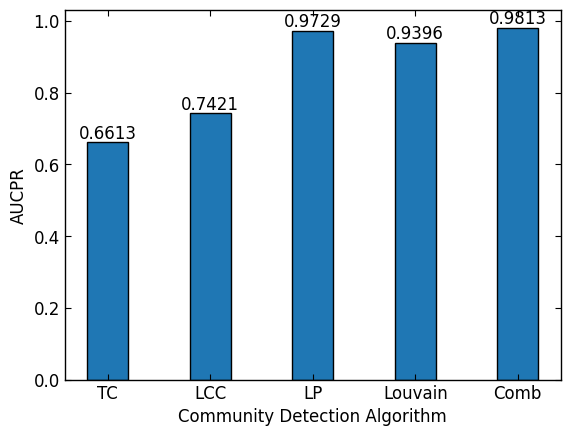

In [14]:
legend = ["TC = Triangle Count", "LCC = Local Clustering Coefficient", "LP = Label Propagation", "Louvain = Louvain"]
xlabel = "Community Detection Algorithm"

TC = [0.6612857296761698]
LCC = [0.7421462630798839]
LP = [0.9729450854782699]
Louvain = [0.9396063057205888]
Comb = [0.9812806536806291]

plot_dict_bar(xlabel=xlabel, ylabel="AUCPR", legend=legend, text=True, TC=TC, LCC=LCC, LP=LP, Louvain=Louvain, Comb=Comb)

# nsdi

## ndcg-loss

In [15]:
# plot_log_line("ndcg-loss.txt", xlabel="RWer Loss (%)", ylabel="Average NDCG Score", ybegin=0.990, yend=1.000)

## packet loss 0.03%

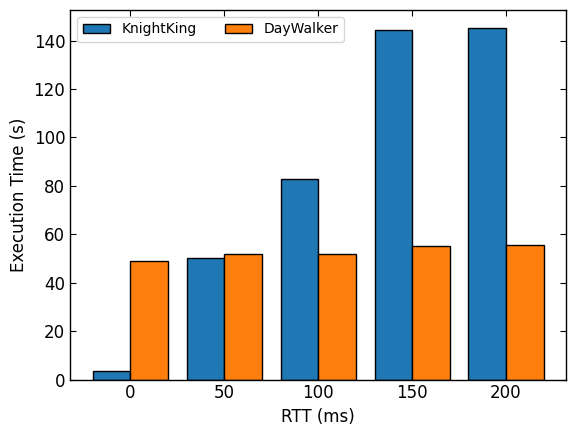

In [16]:
dmap = {"0": [3.5347, 48.97],
        "50": [50.1659, 51.745],
        "100": [82.9234, 51.72],
        "150": [144.4820, 55.28],
        "200": [145.3361, 55.474]}

plot_dict_bar(xlabel="RTT (ms)",
              ylabel="Execution Time (s)",
              legend=["KnightKing", "DayWalker"],
              **dmap)

## rtt 100ms

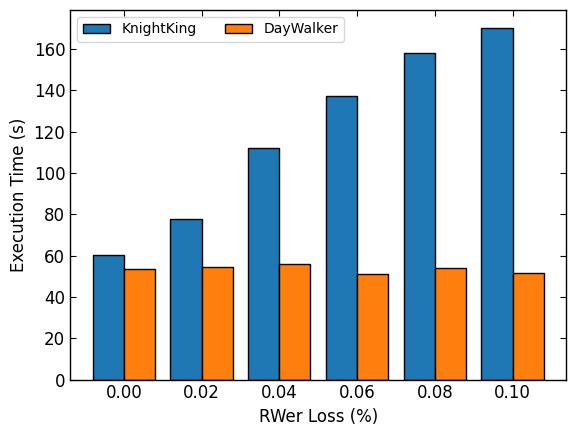

In [17]:
dmap = {"0.00": [60.1967, 53.715],
        "0.02": [77.8660, 54.633],
        "0.04": [111.9560, 56.066],
        "0.06": [137.4617, 51.194],
        "0.08": [158.0077, 54.031],
        "0.10": [170.4120, 51.708]}

plot_dict_bar(xlabel="RWer Loss (%)",
              ylabel="Execution Time (s)",
              legend=["KnightKing", "DayWalker"],
              **dmap)

## path reuse

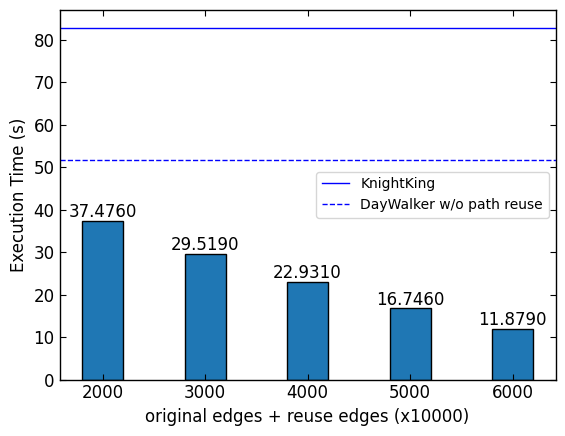

In [18]:
dmap = {"2000": [37.476],
        "3000": [29.519],
        "4000": [22.931],
        "5000": [16.746],
        "6000": [11.879]}

plot_dict_bar(xlabel="original edges + reuse edges (x10000)",
              ylabel="Execution Time (s)",
              text=True,
              baseline=82.9234,
              baseline_label="KnightKing",
              baseline2=51.72,
              baseline_label2="DayWalker w/o path reuse",
              **dmap)

## graph partition accuracy

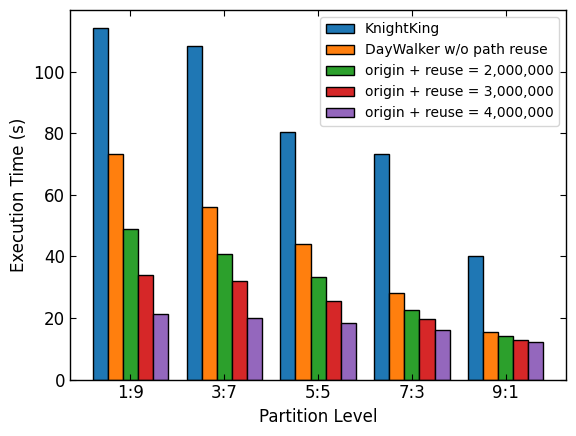

In [19]:
dmap = {"1:9": [114.2685, 73.281, 48.851, 33.943, 21.413],
        "3:7": [108.2059, 56.098, 40.858, 31.947, 20.016],
        "5:5": [80.28362, 44.047, 33.439, 25.376, 18.334],
        "7:3": [73.1289, 28.091, 22.723, 19.548, 16.021],
        "9:1": [40.2542, 15.335, 14.051, 12.934, 12.218]}

plot_dict_bar(xlabel="Partition Level",
              ylabel="Execution Time (s)",
              legend=["KnightKing", "DayWalker w/o path reuse", "origin + reuse = 2,000,000", "origin + reuse = 3,000,000", "origin + reuse = 4,000,000"],
              legend_loc="upper right",
              **dmap)

## graph partition num (livejournal)

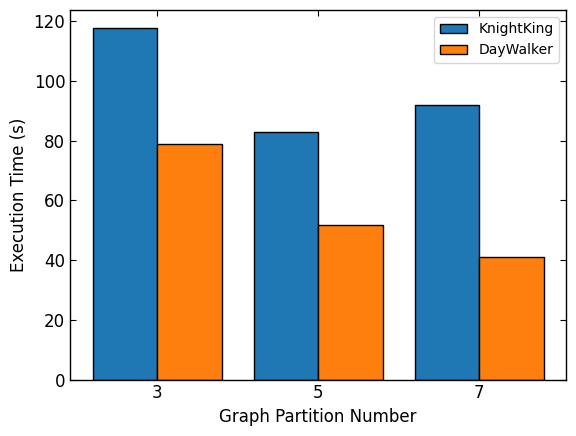

In [20]:
dmap = {"3": [117.8146, 78.898],
        "5": [82.9234, 51.72],
        "7": [92.0273, 40.98]}

plot_dict_bar(xlabel="Graph Partition Number",
              ylabel="Execution Time (s)",
              legend=["KnightKing", "DayWalker"],
              legend_loc="upper right",
              **dmap)

## graph partition num (synthetic)

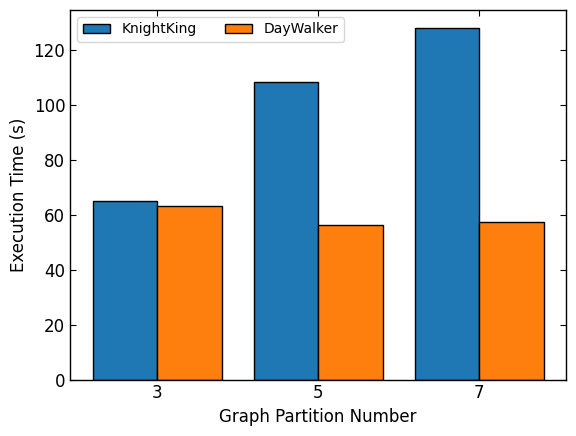

In [21]:
dmap = {"3": [64.9731, 63.124],
        "5": [108.2059, 56.098],
        "7": [128.0843, 57.415]}

plot_dict_bar(xlabel="Graph Partition Number",
              ylabel="Execution Time (s)",
              legend=["KnightKing", "DayWalker"],
              **dmap)

## rw termination probability

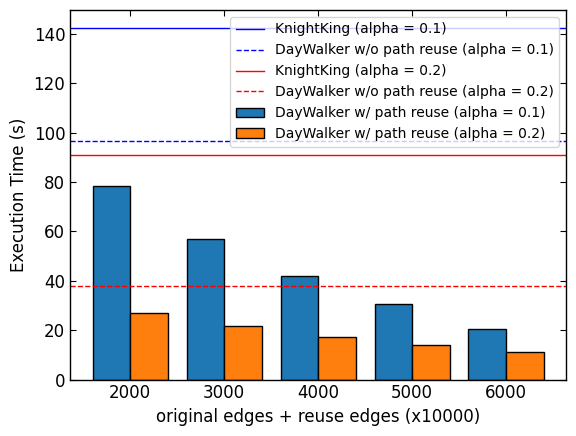

In [22]:
dmap = {"2000": [78.28, 26.95],
        "3000": [57.06, 21.652],
        "4000": [41.945, 17.282],
        "5000": [30.724, 13.936],
        "6000": [20.618, 11.142]}

plot_dict_bar(xlabel="original edges + reuse edges (x10000)",
              ylabel="Execution Time (s)",
              legend=["DayWalker w/ path reuse (alpha = 0.1)", "DayWalker w/ path reuse (alpha = 0.2)"],
              legend_loc="upper right",
              baseline=142.5123,
              baseline_label="KnightKing (alpha = 0.1)",
              baseline2=96.431,
              baseline_label2="DayWalker w/o path reuse (alpha = 0.1)",
              baseline3=91.1009,
              baseline_label3="KnightKing (alpha = 0.2)",
              baseline4=37.79,
              baseline_label4="DayWalker w/o path reuse (alpha = 0.2)",
              **dmap)

## individual vs bulk

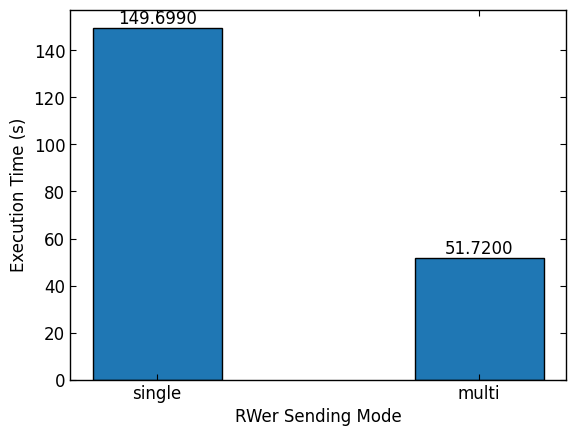

In [23]:
dmap = {"single": [149.699],
        "multi": [51.72]}

plot_dict_bar(xlabel="RWer Sending Mode",
              ylabel="Execution Time (s)",
              legend_loc="upper right",
              text=True,
              **dmap)

## reuse edges num

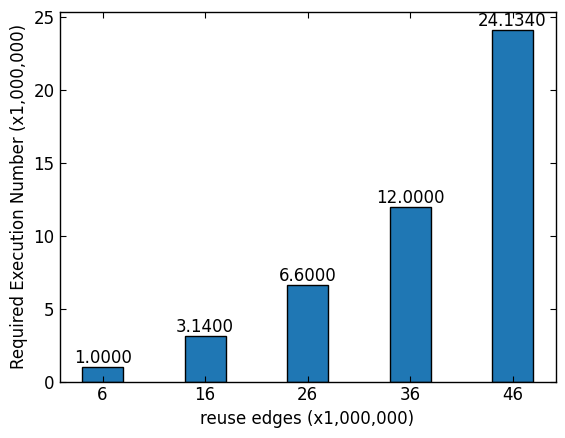

In [24]:
dmap = {"6": [1.000002],
        "16": [3.140000],
        "26": [6.600000],
        "36": [12.000000],
        "46": [24.133995]}

plot_dict_bar(xlabel="reuse edges (x1,000,000)",
              ylabel="Required Execution Number (x1,000,000)",
              text=True,
              **dmap)

# emb (dimension = 128)

## svc (training ratio=0.75)

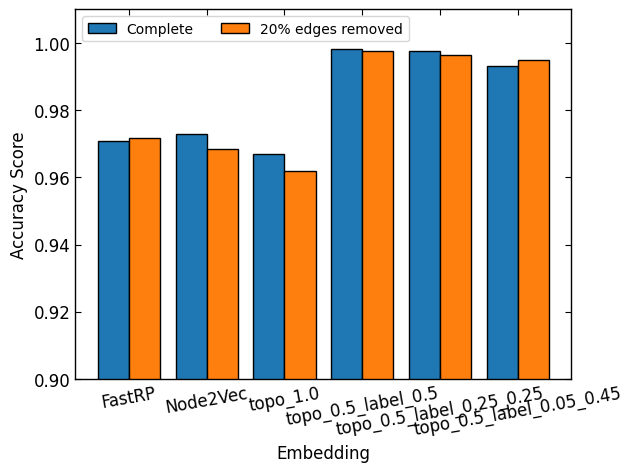

In [25]:
dmap = {"FastRP": [0.9709, 0.9716],
        "Node2Vec": [0.9729, 0.9684],
        "topo_1.0": [0.9671, 0.9620],
        "topo_0.5_label_0.5": [0.9982, 0.9975],
        "topo_0.5_label_0.25_0.25": [0.9975, 0.9965],
        "topo_0.5_label_0.05_0.45": [0.9932, 0.9949]}

plot_dict_bar(xlabel="Embedding",
              ylabel="Accuracy Score",
              legend=["Complete", "20% edges removed"], # 20% edges removed (connected guaranteed)
              xrotation=10,
              ybegin=0.9,
              yend=1.01,
              **dmap)

## micro-f1

In [26]:
# plot_log_line("micro-f1.txt", legend=["FastRP", "Node2Vec", "topo_1.0", "topo_0.5_label_0.5", "topo_0.5_label_0.25_0.25", "topo_0.5_label_0.05_0.45"], legend_loc="lower right", xlabel="Training Ratio", ylabel="Micro-F1 Score")

## macro-f1

In [27]:
# plot_log_line("macro-f1.txt", legend=["FastRP", "Node2Vec", "topo_1.0", "topo_0.5_label_0.5", "topo_0.5_label_0.25_0.25", "topo_0.5_label_0.05_0.45"], legend_loc="lower right", xlabel="Training Ratio", ylabel="Macro-F1 Score")

# link prediction (20% edges removed while keep connected)

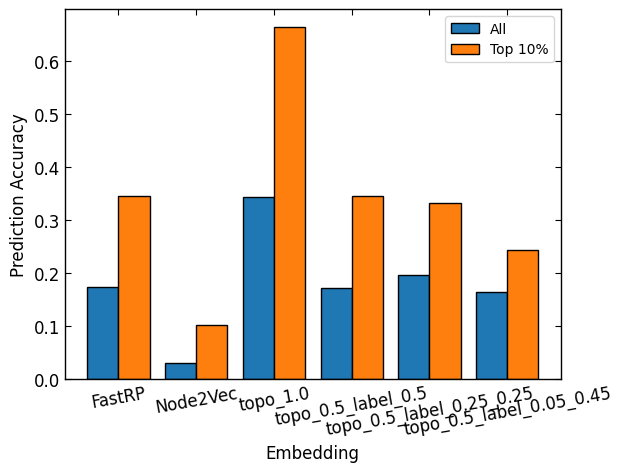

In [28]:
dmap = {"FastRP": [0.1728, 0.3458],
        "Node2Vec": [0.0296, 0.1019],
        "topo_1.0": [0.3439, 0.6649],
        "topo_0.5_label_0.5": [0.1717, 0.3458],
        "topo_0.5_label_0.25_0.25": [0.1959, 0.3324],
        "topo_0.5_label_0.05_0.45": [0.1642, 0.2440]}

plot_dict_bar(xlabel="Embedding",
              ylabel="Prediction Accuracy",
              legend=["All", "Top 10%"],
              legend_loc="upper right",
              xrotation=10,
              **dmap)

# Normalized Mutual Information vs K-means

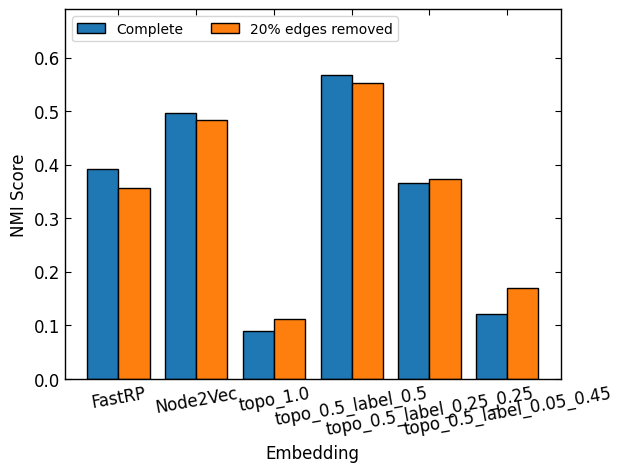

In [29]:
dmap = {"FastRP": [0.3926, 0.3559],
        "Node2Vec": [0.4972, 0.4834],
        "topo_1.0": [0.0902, 0.1125],
        "topo_0.5_label_0.5": [0.5684, 0.5531],
        "topo_0.5_label_0.25_0.25": [0.3650, 0.3728],
        "topo_0.5_label_0.05_0.45": [0.1221, 0.1700]}

plot_dict_bar(xlabel="Embedding",
              ylabel="NMI Score",
              legend=["Complete", "20% edges removed"], # 20% edges removed (connected guaranteed)
              xrotation=10,
              ybegin=0.0,
              yend=0.69,
              **dmap)

# HPC研究会2025

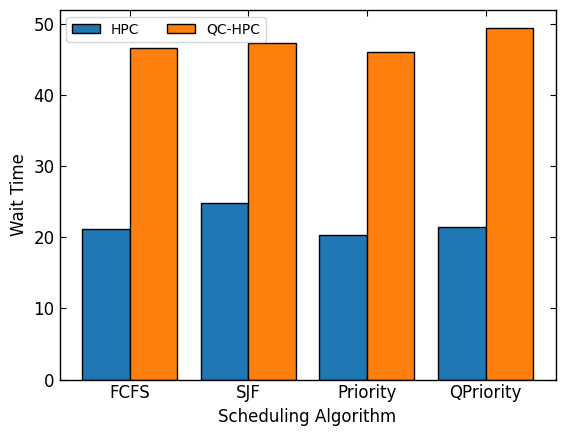

In [30]:
legend = ['HPC', 'QC-HPC']
xlabel = 'Scheduling Algorithm'
ylabel = 'Wait Time'

FCFS = [21.2, 46.6]
SJF = [24.8, 47.3]
Priority = [20.4, 46.1]
QPriority = [21.5, 49.5]

plot_dict_bar(xlabel=xlabel, ylabel=ylabel, legend=legend, FCFS=FCFS, SJF=SJF, Priority=Priority, QPriority=QPriority)